# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [99]:
# Shape of the dataframe
df.shape

(130, 3)

In [100]:
# Inspecting the dataframe 
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [101]:
# Checking for null values, if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## 1. Is the distribution of body temperatures normal?

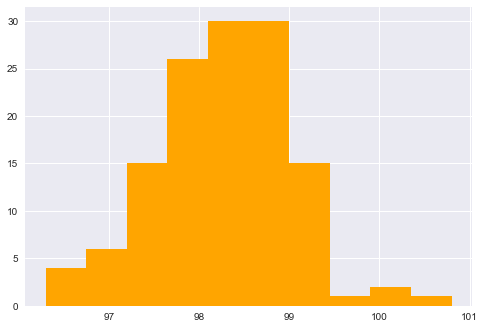

In [102]:
_ = plt.hist(df['temperature'], color = 'orange')
plt.show()

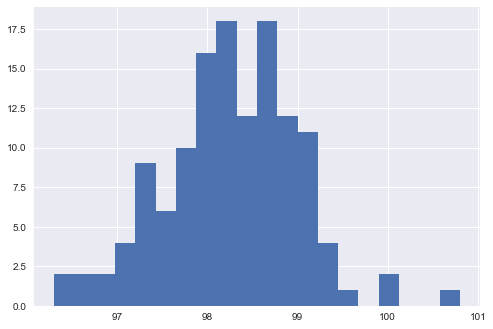

In [103]:
_ = plt.hist(df['temperature'], bins = 20)
plt.show()

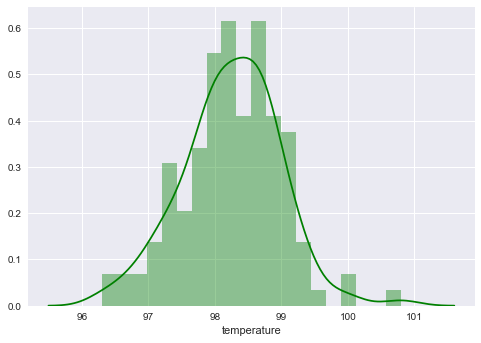

In [104]:
sns.set()
sns.distplot(df.temperature, bins = 20, color = 'green')
plt.show()

In [105]:
# ECDF 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [106]:
# Calculating mean and standard deviation
temperature = df.temperature
mean, std = temperature.mean(), temperature.std()
n = len(temperature)

In [107]:
# Seeding the random number generator:
np.random.seed(10)

# Drawing random samples from random distribution
random_samples = np.random.normal(mean, std, size=10000)

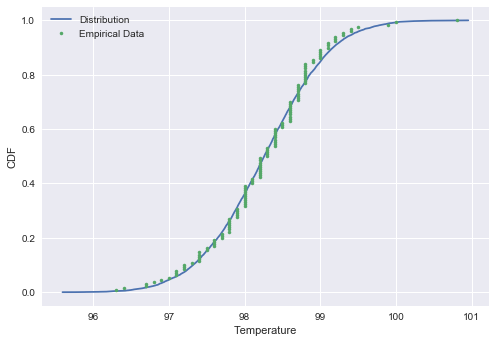

In [108]:
# ECDF on temperature data and on random samples
temperature_x, temperature_y = ecdf(temperature)
random_samples_x, random_samples_y = ecdf(random_samples)

# Plotting the ECDFs for temperature and random sample 
sns.set()
_ = plt.plot(random_samples_x, random_samples_y)
_ = plt.plot(temperature_x, temperature_y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.legend(('Distribution', 'Empirical Data'))
plt.show()

From the above plots of histograms with bins and ecdfs without bins; it is evident that 'temperature' is normally distributed

## 2. Is the sample size large? Are the observations independent?

In [109]:
df.shape

(130, 3)

Since the number of observations is 130 ( >30), the sample size is large enough.

Observations in the data are independent as it is apparent that it is not influenced by any other observation.  

## 3. Is the true population mean really 98.6 degrees F?

    (a) First, try a bootstrap hypothesis test.
    (b) Now, let's try frequentist statistical testing. 
    (c) Would you use a one-sample or two-sample test? Why?
    (d) In this situation, is it appropriate to use the tt or zz statistic?
    (e) Now try using the other test. How is the result be different? Why? 

##### 3(a)First, try a bootstrap hypothesis test.

In [110]:
# Function to draw bootstap replicates
def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data,size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)        
    return bs_replicates

In [111]:
# Calculating shifted mean from theoretical mean (98.6)
theoretical_mean = 98.6
shifted_mean = temperature - mean + theoretical_mean

# Drawing Bootsrap replicates
bs_replicates_temp = draw_bs_reps(shifted_mean, np.mean, size=10000)
p = np.sum(bs_replicates_temp <= mean)/len(bs_replicates_temp)
p

0.0

Since p_value is less than 0.05 it indicates that the true population mean is siginficantly different than 98.6 F.

##### 3(b)  Now, let's try frequentist statistical testing.
##### 3(c) Would you use a one-sample or two-sample test? Why?
##### 3(d) In this situation, is it appropriate to use the tt or zz statistic?

A one sample t-test is used to compare the mean of a sample to a known value.
A two sample t-test is used to compare the means of two different samples.

Since we are comparing the mean of a sample to a single known value, we use a "one-sample" test. 
Also, as we do not know the vairance of the population, we have to use a t-statistic. 

However, performing t-test on larger samples might yeild similar results to that of z-test.

Null Hypothesis: μ = 98.6

In [112]:
#  Calculating t-value and p
t_stat = stats.ttest_1samp(df['temperature'], 98.6)[0]
p = stats.ttest_1samp(df['temperature'], 98.6)[1]

# Confidence Interval
print((stats.t.ppf(q = 0.005, df = n-1)), (stats.t.ppf(q = 0.995, df = n-1)))
t_stat

-2.6144786797 2.6144786797


-5.4548232923645195

The value of t-statistic is way beyond range of t-distribution [-2.6144786797, 2.6144786797].
Also, since p-value is less than 0.01, we reject the null hypothesis.

##### 3(e) Now try using the other test. How is the result be different? Why? 

Firstly, we do not know the standard deviation of the population. However, we can calculate it using standard error of mean.

In [113]:
# Standard error of mean
sem = std/np.sqrt(n)

# Z-statistic and p-vaue
z_stat = (mean - theoretical_mean) / sem
p = stats.norm.cdf(z_stat) * 2

In [114]:
z_stat, p

(-5.4548232923640789, 4.9021570141133797e-08)

In [115]:
# Compare t-statistic and z-statistic
t_stat, z_stat

(-5.4548232923645195, -5.4548232923640789)

Both z-statistic and t-statistic are very close, and p-value is less than .

From the above tests, (bootstapping test, t-test and z-test); p-valus is less than 0.01. Hence, we reject that true population mean is 98.5 F.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

We perform t-test because the population standard deviation is unknown  adn sample size is less than 30

In [130]:
# Seed the random number generator
np.random.seed(10)

# Drawing a random sample of 10
sample = np.random.choice(temperature, size=10)
sample

array([ 98.6,  96.3,  98.8,  98.7,  99.1,  97.2,  99.1,  98.4,  98.8,  99.3])

In [132]:
# T-statistic and p-value:
# t_stat = stats.ttest_1samp(sample, theoretical_mean)[0]
# p = stats.ttest_1samp(sample, theoretical_mean)[1]

t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]


print('t-statistic:', t)
print('p-value:', p)

t-statistic: -0.56733244723
p-value: 0.584359801476


In [133]:
# Z-statistic and p-value
z = (np.mean(sample) - theoretical_mean) / (np.std(sample)/np.sqrt(len(sample)))
p = stats.norm.cdf(z) * 2

print('z-statistic:', z_stat)
print('p-value:', p)

z-statistic: -5.45482329236
p-value: 0.549825982398


In [119]:
# confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

# confidence level (99.9%) and degrees of freedom:
# print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-2.26215716274 2.26215716274


From the above tests, it is evident that we can reject the null hypothesis.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

    As in the previous example,try calculating everything using the boostrap approach, as well as the frequentist approach
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 




In [126]:
# Calculating z-critical value
z_critical = stats.norm.ppf(0.9995)
z_critical

3.2905267314919255

In [127]:
# Margin of Error 
# moe_z = z_critical*(std/np.sqrt(len(df)))
print(sem)
moe = z_critical*sem
moe

0.0643044168379


0.21159540255807985

In [121]:
sem

0.06430441683789101

In [128]:
# Confidence Interval
# ci = mean + np.array([-1, 1]) * moe_z
ci_1 = mean + moe
ci_2 = mean - moe

In [129]:
print(ci_2, ci_1)

98.0376353667 98.4608261718


If the temperature is not between 98.12 and 98.37, it is considered as "abnormal"

## 6. Is there a significant difference between males and females in normal temperature?

Null Hypothesis: Mean of male and female temperatures are equal.

Alternate Hypothesis: Mean of male and female temperatures are not equal.
    

In [110]:
# Male and Female temperatures
temp_males =np.array(df.loc[df['gender']=='M']['temperature'])
temp_females =np.array(df.loc[df['gender']=='F']['temperature'])

# Mean Difference
#mean_diff = temp_mean 

# Male and Female temperatures with shifted means
temp_males_mean_shifted = temp_males - np.mean(temp_males) + temp_mean
temp_females_mean_shifted = temp_females - np.mean(temp_females) + temp_mean

# Draw boostrapping samples for male and female temperatures (simulate data)
bs_replicates_males = draw_bs_reps(temp_males_mean_shifted, np.mean, size=1000)
bs_replicates_females = draw_bs_reps(temp_females_mean_shifted, np.mean, size=1000)

# Calculating test statistic (test statistic for male and female temperatures)
empirical_diff_means = np.mean(temp_females) - np.mean(temp_males)
bs_replicates_gender = bs_replicates_males - bs_replicates_females 

# Computing the p-value 
p_value = np.sum(bs_replicates_gender >= empirical_diff_means)/1000

In [111]:
p_value

0.012999999999999999

In [113]:
bs_replicates_males.shape

(1000,)

In [107]:
p_value

0.014

Value of p is less than 0.05 which statistically denotes that the temperature between male and female are significantly different.